# Pymaceuticals Inc.
---

### Analysis

- None of the treatments that were studied were able to completely eliminate the tumors.
- The gender of the mice studied was close to an even split, with 51% male mice and 49% female mice. 
- There is a positive correlation between mouse weight and average tumor weight
- 4 treatments were focused on in the detailed analysis: Capomulin, Ramicane, Infubinol, and Ceftamin. Capomulin and Ramicane appear to be the most effective, as they produced the lowest final tumor volumes on average.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_mice = mouse_study["Mouse ID"].unique()
mouse_count = len(unique_mice)
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_cleaned = mouse_study.loc[mouse_study["Mouse ID"].isin(duplicate_id)==False]
study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_cl = study_cleaned["Mouse ID"].unique()
mouse_count_clean = len(unique_mice_cl)
mouse_count_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume (tv). 
mean_tv = study_cleaned["Tumor Volume (mm3)"].groupby(study_cleaned["Drug Regimen"]).mean()
med_tv = study_cleaned["Tumor Volume (mm3)"].groupby(study_cleaned["Drug Regimen"]).median()
var_tv = study_cleaned["Tumor Volume (mm3)"].groupby(study_cleaned["Drug Regimen"]).var()
stdev_tv = study_cleaned["Tumor Volume (mm3)"].groupby(study_cleaned["Drug Regimen"]).std()
sem_tv = study_cleaned["Tumor Volume (mm3)"].groupby(study_cleaned["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
tv_stats = pd.DataFrame({"Mean Tumor Volume" : mean_tv,
                         "Median Tumor Volume" : med_tv,
                         "Tumor Volume Variance" : var_tv,
                         "Tumor Volume Std. Dev." : stdev_tv,
                         "Tumor Volume Std. Err." : sem_tv})
tv_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tv_stats_agg = study_cleaned.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
tv_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

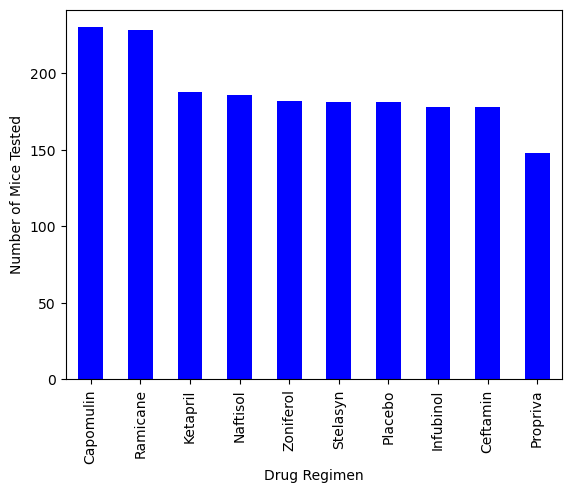

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Determine count of mice in each regimen
regimen_count = study_cleaned["Drug Regimen"].value_counts()

# Make plot
regimen_plot_pandas = regimen_count.plot.bar(color="b")

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

regimen_plot_pandas
# Note - Chart provided in starter code does not have title, thus I have excluded it from my solution

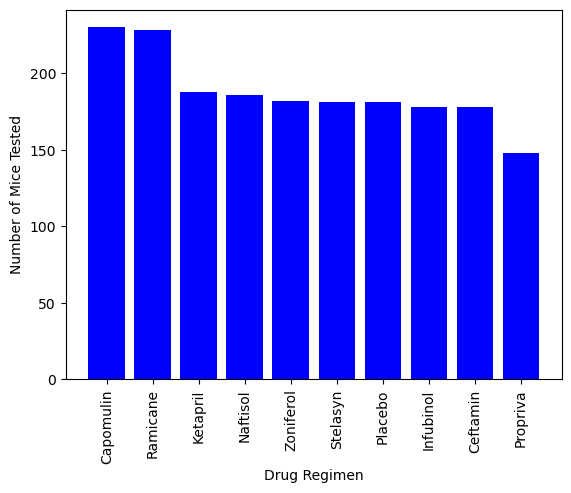

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Designate axis
x_axis = regimen_count.index.values
y_axis = regimen_count

# Make plot
plt.bar(x_axis, y_axis, color="b", align="center")

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()
# Note - Chart provided in starter code does not have title, thus I have excluded it from my solution

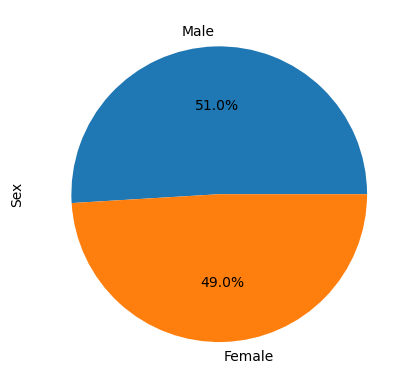

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate data
gender = study_cleaned["Sex"].value_counts()

# Generate plot
gender.plot.pie(autopct="%1.1f%%")
plt.show()
# Note - Chart provided in starter code does not have title, thus I have excluded it from my solution

<function matplotlib.pyplot.show(close=None, block=None)>

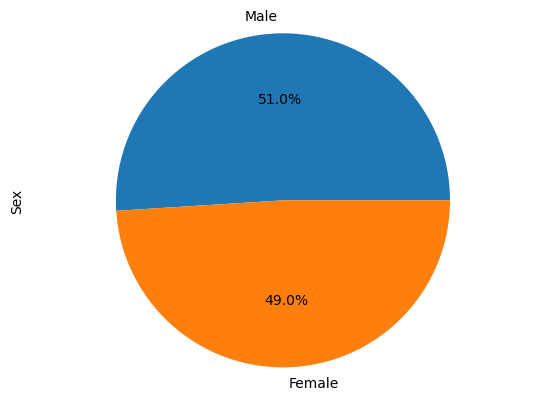

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels and use the above pie chart to set gender % values
labels = ["Male", "Female"]
percents = [51, 49]

# Make plot
plt.pie(percents, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show
# Note - Chart provided in starter code does not have title, thus I have excluded it from my solution

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = study_cleaned.groupby("Mouse ID").max()["Timepoint"]

# Turn greatest time points into df for merging
greatest_time_df = pd.DataFrame(greatest_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_time_data = pd.merge(greatest_time_df, study_cleaned, how="left", on=("Mouse ID", "Timepoint"))
greatest_time_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_vol = greatest_time_data.loc[greatest_time_data["Drug Regimen"] == treatment, :]
    
    
    # add subset 
    # ???
    
    # Determine outliers using upper and lower bounds
    quartiles = max_vol["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_b = lowerq - (1.5*iqr)
    upper_b = upperq + (1.5*iqr)
    outlier = max_vol.loc[(max_vol["Tumor Volume (mm3)"] < lower_b) | (max_vol["Tumor Volume (mm3)"] > upper_b)]
    if len(outlier) < 1:
        print(f"{treatment} has no outliers")
    else: 
        print(f"{treatment} has the following outliers:")
        print(outlier.to_string(index = False))
    
    # Append tumor_vol list for plotting
    max_vol = max_vol.loc[:, "Tumor Volume (mm3)"]
    tumor_vol.append(max_vol)

Capomulin has no outliers
Ramicane has no outliers
Infubinol has the following outliers:
Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen    Sex  Age_months  Weight (g)
    c326          5           36.321346                 0    Infubinol Female          18          25
Ceftamin has no outliers


C:\Users\jack.f\AppData\Local\Temp\ipykernel_19704\3747363613.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


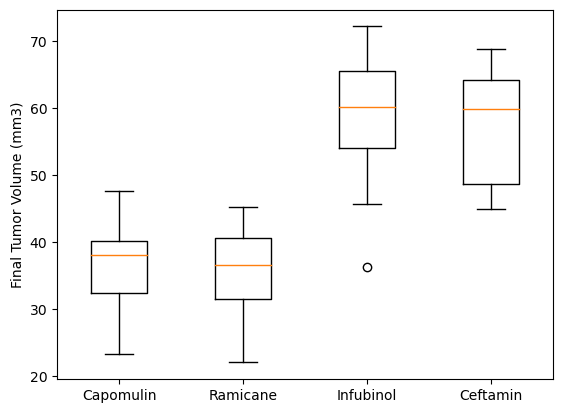

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
# No title on starter code solution, excluding title
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol)
plt.show()


## Line and Scatter Plots

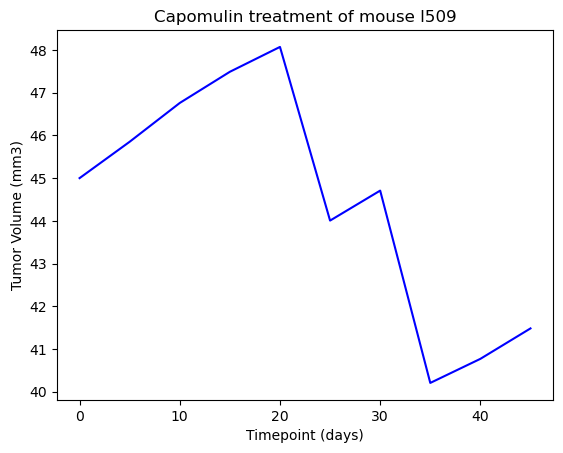

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Creating df with only mouse l509 based on starter code plot
cap_data = study_cleaned.loc[study_cleaned["Mouse ID"] == "l509"]

# Setting x axis
xaxis = cap_data["Timepoint"]

# Setting y axis
yaxis = cap_data["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
ax2.set_title("Capomulin treatment of mouse l509")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (days)")
ax2.plot(xaxis, yaxis, color="blue")
plt.show()

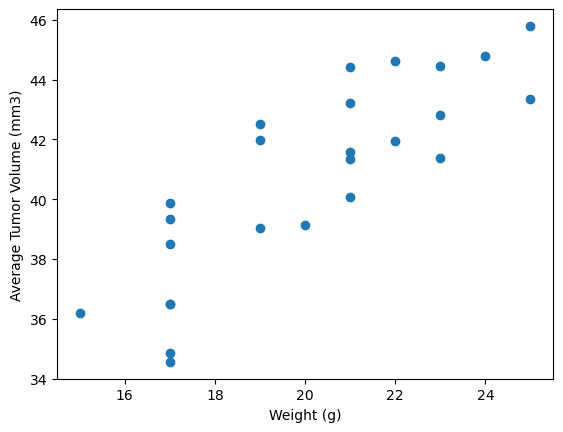

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap_data = study_cleaned.loc[study_cleaned["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(avg_cap_data["Weight (g)"], avg_cap_data["Tumor Volume (mm3)"])
# no plot title on starter code plot
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


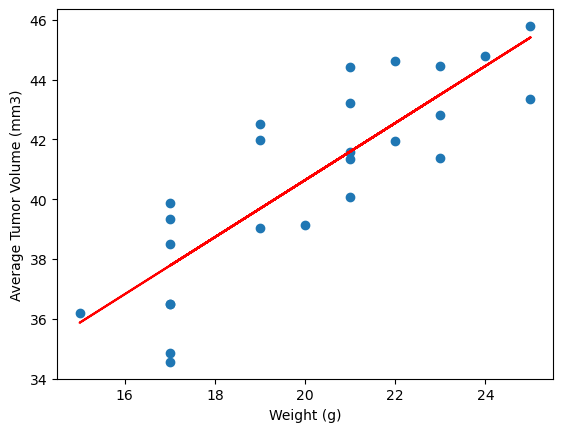

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap_data["Weight (g)"], avg_cap_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_cap_data["Weight (g)"], avg_cap_data["Tumor Volume (mm3)"])
regress_values = avg_cap_data["Weight (g)"] * slope + intercept
plt.scatter(avg_cap_data["Weight (g)"], avg_cap_data["Tumor Volume (mm3)"])
plt.plot(avg_cap_data["Weight (g)"], regress_values,"r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()